## Newton-Raphson for equations
Find the solution for  
\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}

In [1]:
# Homework: using Newton-Raphson method to solve above equation arrays
# Hint: first you need to derive the partical derivative of the equation arrays. You can do it either 
# analytically by hand or numerically using method we learned in the last lecture.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

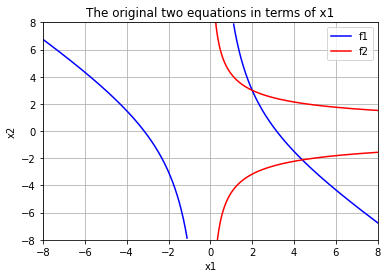

In [3]:
# Define f1 and f2 in terms of x1 for plotting

def f1_solved_for_x2(x):
    return (10.-x*x)/x

def f2_solved_for_x2_positive(x):
    try:
        return (-1+np.sqrt(1.+4.*3.*x*57))/6./x
    except:
        return 

def f2_solved_for_x2_negative(x):
    return (-1-np.sqrt(1.+4.*3.*x*57))/6./x

# Draw graphics to roughly determine x1 and x2
np.seterr(all="ignore")
xs = np.linspace(-8,8,1000)
f1_solved_for_x2_values = f1_solved_for_x2(xs)
f2_solved_for_x2_positive_values = f2_solved_for_x2_positive(xs)
f2_solved_for_x2_negative_values = f2_solved_for_x2_negative(xs)

plt.xlim(-8,8)
plt.ylim(-8,8)

# Ignore points outside range for f1 (prevents vertical asymptotic line from being plotted)
f1_solved_for_x2_values[f1_solved_for_x2_values > plt.ylim()[1]] = np.nan
f1_solved_for_x2_values[f1_solved_for_x2_values < plt.ylim()[0]] = np.nan

plt.plot(xs, f1_solved_for_x2_values, 'b', label='f1')
plt.plot(xs, f2_solved_for_x2_positive_values, 'r', label='f2')
plt.plot(xs, f2_solved_for_x2_negative_values, 'r')

plt.title('The original two equations in terms of x1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()



In [4]:
def f1(x1,x2):
    return (x1*x1+x1*x2-10.)

def f2(x1,x2):
    return (x2+3*x1*x2*x2-57)

def partial_deriv(f,x1,x2,wrt,dx):
    # Returns the partial derivative of f with respect to wrt
    if wrt == 'dx1':
        return (f(x1+dx/2,x2) - f(x1-dx/2,x2)) / dx
    if wrt == 'dx2':
        return (f(x1,x2+dx/2) - f(x1,x2-dx/2)) / dx
    raise Exception('Invalid wrt argument in partial derivative!')

# Partial derivative functions
def f1x1(x1,x2):
    return partial_deriv(f1, x1, x2, 'dx1', dx=0.01)

def f1x2(x1,x2):
    return partial_deriv(f1, x1, x2, 'dx2', dx=0.01)
    
def f2x1(x1,x2):
    return partial_deriv(f2, x1, x2, 'dx1', dx=0.01)
    
def f2x2(x1,x2):
    return partial_deriv(f2, x1, x2, 'dx2', dx=0.01)

# The tiny change in x1 and x2
def dx1(f1,f2,f1x1,f1x2,f2x1,f2x2):
    return (f1x2*f2 - f2x2*f1) / (f1x1*f2x2 - f1x2*f2x1)

def dx2(f1,f2,f1x1,f1x2,f2x1,f2x2):
    return (f2x1*f1 - f1x1*f2) / (f1x1*f2x2 - f1x2*f2x1)

def newton_raphson(x1,x2,Nmax,eps):
    print("Starting with ({},{})".format(x1,x2))
    for i in range(Nmax):
        f1_value = f1(x1,x2)
        f2_value = f2(x1,x2)
        f1x1_value = f1x1(x1,x2)
        f1x2_value = f1x2(x1,x2)
        f2x1_value = f2x1(x1,x2)
        f2x2_value = f2x2(x1,x2)

        if abs(f1_value) < eps and abs(f2_value) < eps:
            print("Number of iterations:", i)
            break

        x1=x1+dx1(f1_value,f2_value,f1x1_value,f1x2_value,f2x1_value,f2x2_value)
        x2=x2+dx2(f1_value,f2_value,f1x1_value,f1x2_value,f2x1_value,f2x2_value)

    print('x1 =', x1)
    print('x2 =', x2)
    
    return 

Nmax = 100
eps = 1e-8
print('eps =', eps)
print()
newton_raphson(1,1,Nmax,eps)
print()
newton_raphson(4,-2,Nmax,eps)


eps = 1e-08

Starting with (1,1)
Number of iterations: 6
x1 = 2.000000000000006
x2 = 2.9999999999999907

Starting with (4,-2)
Number of iterations: 4
x1 = 4.393744193288599
x2 = -2.1177810147141836
